# Thyroid Disease Prediction

## Importing libraries & loading the data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max.columns', None)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Thyroid detection Project/hypothyroid.csv', na_values=['?'])
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other,P
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other,P
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


## Getting familiar with the data

In [ ]:
data['binaryClass'].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [ ]:
data.describe(exclude = 'object').T

,count,mean,std,min,25%,50%,75%,max
age,3771.0,51.735879,20.084958,1.000,36.00,54.00,67.00,455.00
TSH,3403.0,5.086766,24.521470,0.005,0.50,1.40,2.70,530.00
T3,3003.0,2.013500,0.827434,0.050,1.60,2.00,2.40,10.60
TT4,3541.0,108.319345,35.604248,2.000,88.00,103.00,124.00,430.00
T4U,3385.0,0.995000,0.195457,0.250,0.88,0.98,1.08,2.32
FTI,3387.0,110.469649,33.089698,2.000,93.00,107.00,124.00,395.00
TBG,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`We will grop the categorical 'measured' columns & keep only their values.`

`We will also drop **TBG** as it only contains NaN.`

In [ ]:
drop_list = ['TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured',
       'FTI measured', 'TBG measured', 'TBG']
df = data.copy()
df.drop(columns = drop_list, inplace = True)
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,4.10,2.0,102.0,NaN,NaN,other,P
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.98,NaN,109.0,0.91,120.0,other,P
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,0.16,1.9,175.0,NaN,NaN,other,P
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,P


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [ ]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral source', 'binaryClass'],
      dtype='object')

In [ ]:
d = {'t':1,
     'f':0}
cat_tf = ['on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych']

for col in cat_tf:
  df[col] = df[col].map(d)

df.sample(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
3510,60.0,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.40,1.9,106.0,1.06,100.0,SVI,P
1242,34.0,F,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.02,3.7,196.0,1.65,119.0,STMW,P
3629,73.0,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.90,2.0,121.0,1.19,102.0,other,P
3350,42.0,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.0,87.0,0.73,118.0,SVI,P
1711,67.0,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,other,P


## Missing values Analysis & Outlier treatment

In [ ]:
np.round((df.isna().sum()/len(df))*100, 3)

age                           0.027
sex                           3.977
on thyroxine                  0.000
query on thyroxine            0.000
on antithyroid medication     0.000
sick                          0.000
pregnant                      0.000
thyroid surgery               0.000
I131 treatment                0.000
query hypothyroid             0.000
query hyperthyroid            0.000
lithium                       0.000
goitre                        0.000
tumor                         0.000
hypopituitary                 0.000
psych                         0.000
TSH                           9.783
T3                           20.387
TT4                           6.124
T4U                          10.260
FTI                          10.207
referral source               0.000
binaryClass                   0.000
dtype: float64

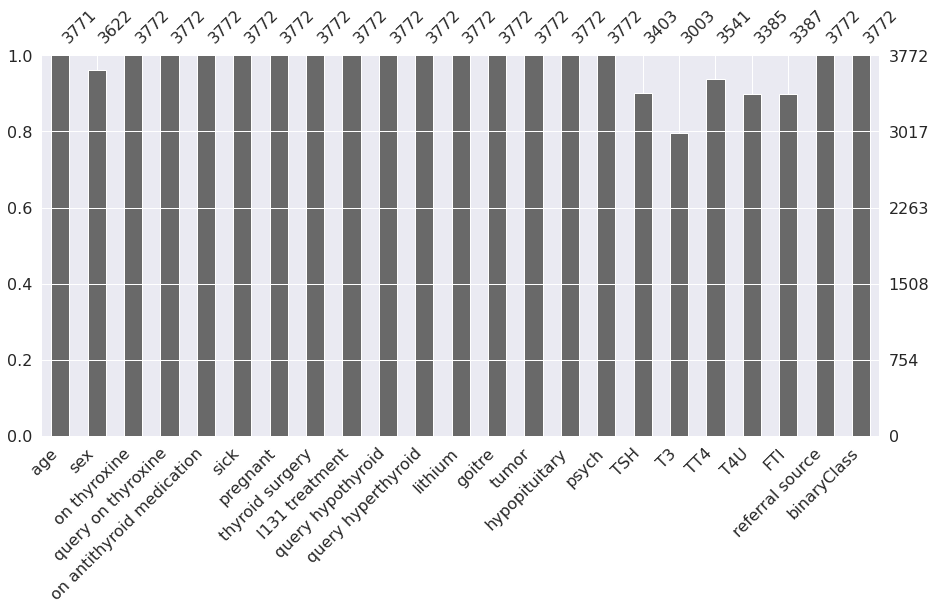

In [ ]:
sns.set(style = 'darkgrid')
import missingno as msn

msn.bar(df, color = 'dimgray', figsize = (15,7))

`T3` has almost 20.4% missing values while `T4U`, `FTI` & `TSH` have ~ 10% missing values. 

`sex` & `age` have ~ 4% & 0.03% missing values.

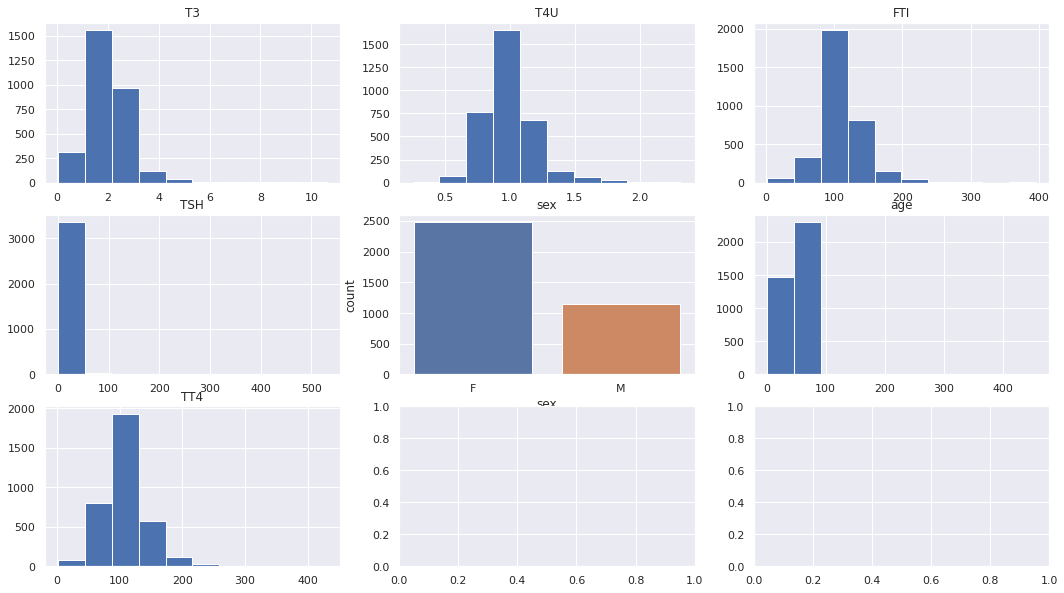

In [ ]:
fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (18,10))
ax[0,0].hist(df['T3'])
ax[0,0].set_title('T3')
ax[0,1].hist(df['T4U'])
ax[0,1].set_title('T4U')
ax[0,2].hist(df['FTI'])
ax[0,2].set_title('FTI')
ax[1,0].hist(df['TSH'])
ax[1,0].set_title('TSH')
sns.countplot(df['sex'], ax = ax[1,1])
ax[1,1].set_title('sex')
ax[1,2].hist(df['age'])
ax[1,2].set_title('age')
ax[2,0].hist(df['TT4'])
ax[2,0].set_title('TT4')
plt.show()

We can see that the data has some outliers so we will replace everything by their respective median & for `sex` we will use mode.

In [ ]:
def outlier_trtment(df, col, remove = False):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df_out = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
  print('Number of outliers in {} is {}'.format(col, len(df_out)))

  if remove:
    bad_idx = df_out.index
    df2 = df.drop(index = bad_idx)
    return df2

In [ ]:
df = outlier_trtment(df, 'age', remove = True)

Number of outliers in age is 1


In [ ]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
0,41.0,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,SVHC,P
1,23.0,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0,NaN,NaN,other,P
2,46.0,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109.0,0.91,120.0,other,P
3,70.0,F,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,NaN,NaN,other,P
4,70.0,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,SVI,P


## Missing value Imputation  (trf1)

In [ ]:
med_cols = ['age', 'T3', 'T4U', 'FTI', 'TSH', 'TT4']
for col in med_cols:
  med = df[col].median()
  df[col].fillna(med, inplace = True)

mode = df['sex'].mode()[0]
df['sex'].fillna(mode, inplace = True)

In [ ]:
df.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral source              0
binaryClass                  0
dtype: int64

In [ ]:
df.sample(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
120,23.0,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.02,3.4,91.0,1.10,83.0,other,P
904,74.0,F,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.40,2.0,109.0,0.96,114.0,other,P
2918,55.0,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.40,2.3,104.0,1.03,101.0,SVHC,P
3125,61.0,F,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.10,1.4,110.0,0.98,107.0,other,P
793,46.0,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.10,2.8,143.0,1.30,110.0,SVI,P


## Univariate Analysis


### Continuous

In [ ]:
def UVA_cont(df, col, remove_outliers = False):
  if remove_outliers:
    df1 = outlier_trtment(df, col, remove = True)
    avg = df1[col].mean()
    med = df1[col].median()
    std = df1[col].std()
    min_ = df1[col].min()
    max_ = df1[col].max()
    kurt = df1[col].kurtosis()
    skew = df1[col].skew()
    print('''{}
    ----------------------
    MEAN: {}
    MEDIAN: {}
    STD DEV: {}
    KURTOSIS: {}
    SKEWNESS: {}
    RANGE: {} - {}
    ----------------------'''.format(col.upper(), avg, med, std, kurt, skew, min_, max_))
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,7))
    sns.histplot(df1[col], ax = ax[0], kde = True)
    sns.boxplot(y = df1[col], ax = ax[1])
  else:
    avg = df[col].mean()
    med = df[col].median()
    std = df[col].std()
    min_ = df[col].min()
    max_ = df[col].max()
    kurt = df[col].kurtosis()
    skew = df[col].skew()
    print('''{}
    ----------------------
    MEAN: {}
    MEDIAN: {}
    STD DEV: {}
    KURTOSIS: {}
    SKEWNESS: {}
    RANGE: {} - {}
    ----------------------'''.format(col.upper(), avg, med, std, kurt, skew, min_, max_))
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,7))
    sns.histplot(df[col], ax = ax[0], kde = True)
    sns.boxplot(y = df[col], ax = ax[1])


#### `AGE`

AGE
    ----------------------
    MEAN: 51.62954123574649
    MEDIAN: 54.0
    STD DEV: 18.980511218852975
    KURTOSIS: -0.8870101178372689
    SKEWNESS: -0.21097031549021042
    RANGE: 1.0 - 94.0
    ----------------------


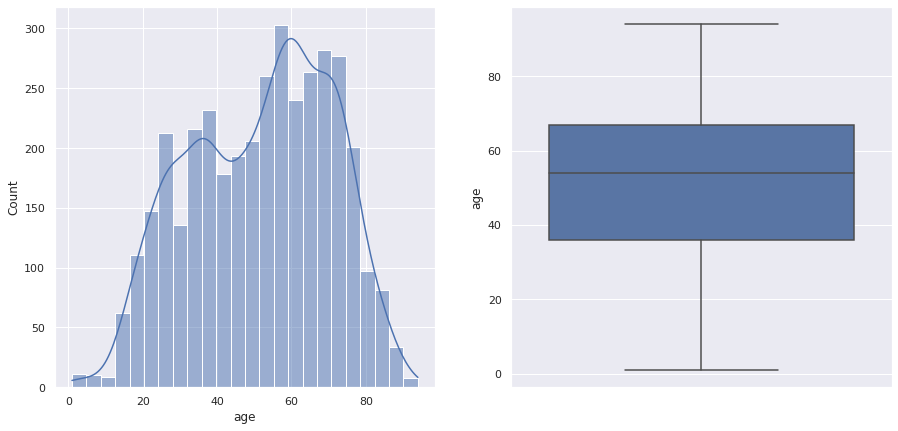

In [ ]:
UVA_cont(df, 'age')

- The age ranges from 1 to 94 with an average of ~52 and median of 54.
- There are more people with age greater than 45 as compared to the ones with age less than 45.
- Most of the people lie in the age group of 55-75.

#### `TSH`

Number of outliers in TSH is 417
TSH
    ----------------------
    MEAN: 1.389336612999409
    MEDIAN: 1.3
    STD DEV: 1.1322362790683462
    KURTOSIS: 0.8555669579779317
    SKEWNESS: 1.021378312365436
    RANGE: 0.005 - 5.2
    ----------------------


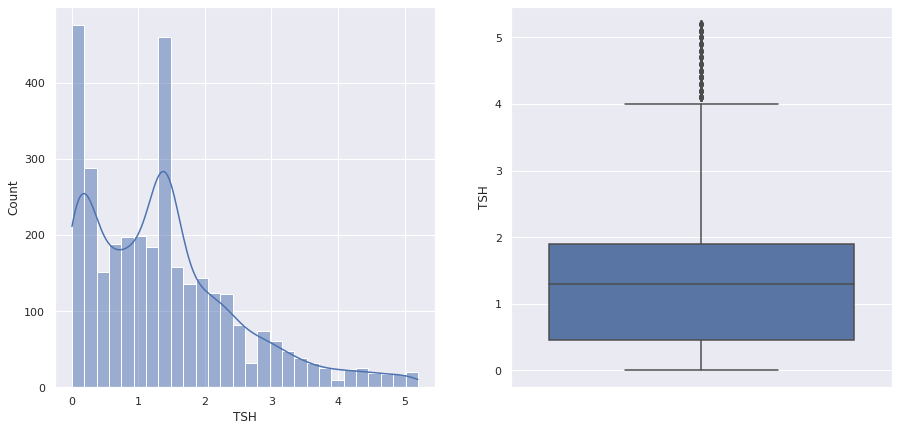

In [ ]:
UVA_cont(df, 'TSH', remove_outliers = True)

TSH
    ----------------------
    MEAN: 4.72706576504904
    MEDIAN: 1.4
    STD DEV: 23.319615707370428
    KURTOSIS: 263.9512025805484
    SKEWNESS: 14.611096957417743
    RANGE: 0.005 - 530.0
    ----------------------


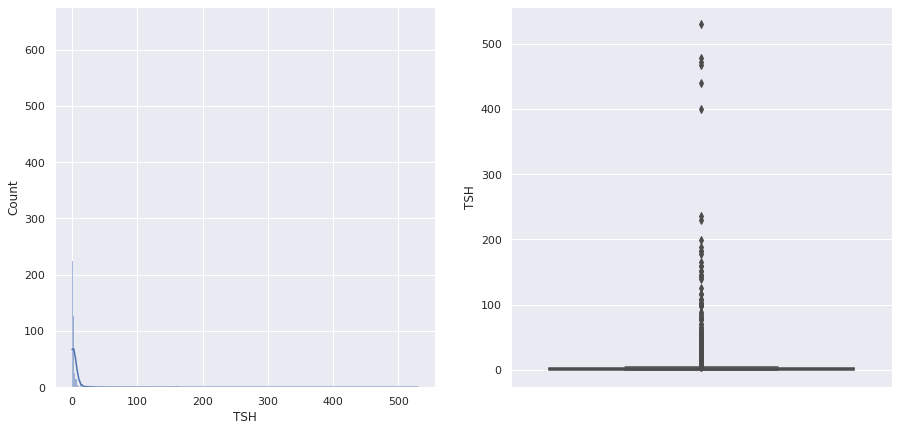

In [ ]:
UVA_cont(df, 'TSH')

- For a healthy human being the TSH levels are between 0.5-5 & anything above that may be indicative of hypothyroidism.
- As we have a lot of patients we see a lot of people have abnormal values for TSH ranging from 0.005 to as high as 530.


#### `T3`

T3
    ----------------------
    MEAN: 2.010750464067885
    MEDIAN: 2.0
    STD DEV: 0.7383799702191725
    KURTOSIS: 13.182120125826795
    SKEWNESS: 1.9504373700437772
    RANGE: 0.05 - 10.6
    ----------------------


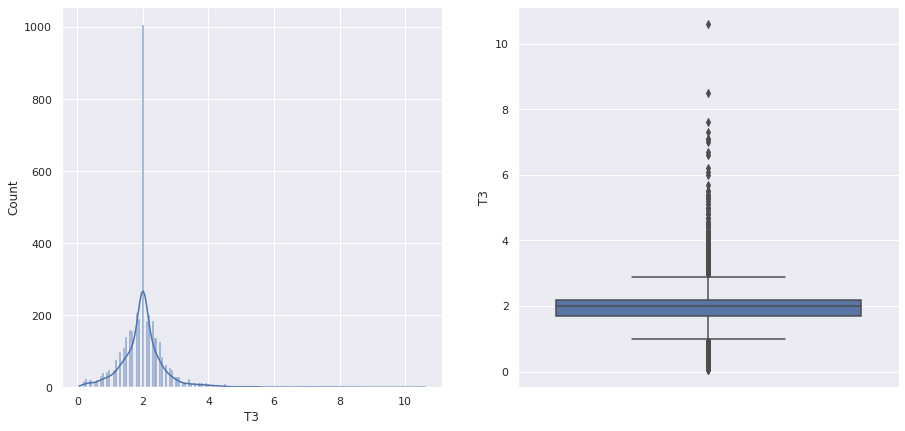

In [ ]:
UVA_cont(df, 'T3')

Number of outliers in T3 is 456
T3
    ----------------------
    MEAN: 1.9649894419306193
    MEDIAN: 2.0
    STD DEV: 0.3949592901378127
    KURTOSIS: 0.07899071650247569
    SKEWNESS: -0.1254815794842615
    RANGE: 1.0 - 2.9
    ----------------------


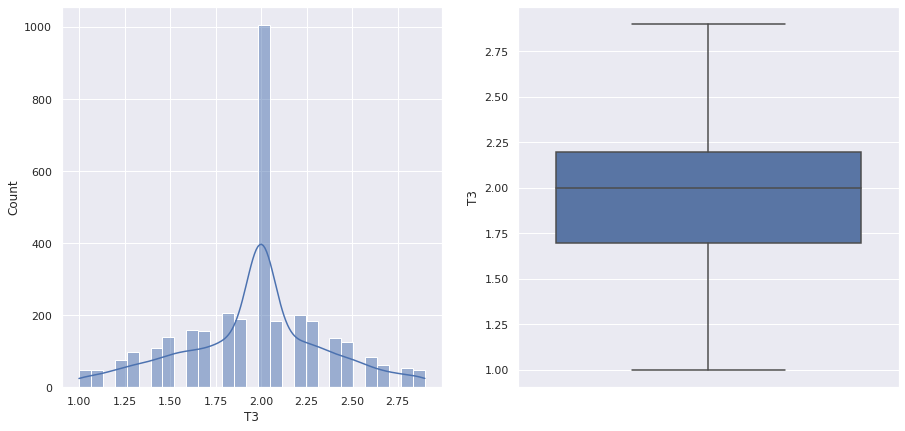

In [ ]:
UVA_cont(df, 'T3', remove_outliers = True)

- T3 is Triiodothyronine & its low levels can be a sign of hypothyroidism.
- It ranges from 0.05-10.6 in our patients with a lot of them having T3 levels close to 2.

#### `TT4`

TT4
    ----------------------
    MEAN: 107.9909307875895
    MEDIAN: 103.0
    STD DEV: 34.52428073353426
    KURTOSIS: 7.265420422027418
    SKEWNESS: 1.3338820826595108
    RANGE: 2.0 - 430.0
    ----------------------


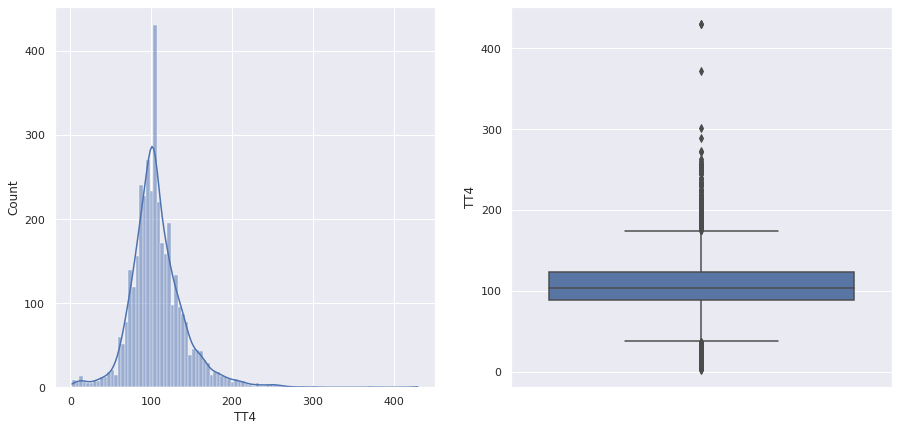

In [ ]:
UVA_cont(df, 'TT4')

Number of outliers in TT4 is 215
TT4
    ----------------------
    MEAN: 105.21934758155231
    MEDIAN: 103.0
    STD DEV: 24.89975914165889
    KURTOSIS: 0.04677873732105198
    SKEWNESS: 0.31226906301927465
    RANGE: 38.0 - 174.0
    ----------------------


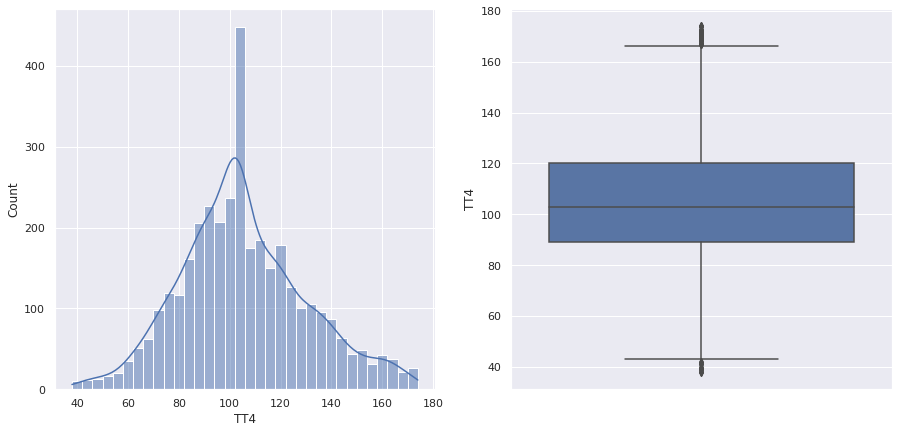

In [ ]:
UVA_cont(df, 'TT4', remove_outliers=True)

- Lower values of TT4 indicate hypothyroidism & higher values indicate hyperthyroidism.
- This seems to near-normally distributed with mean & median ~100.

#### `T4U`

T4U
    ----------------------
    MEAN: 0.9934245558207377
    MEDIAN: 0.98
    STD DEV: 0.185223566459343
    KURTOSIS: 4.916842036801183
    SKEWNESS: 1.3254722033453563
    RANGE: 0.25 - 2.32
    ----------------------


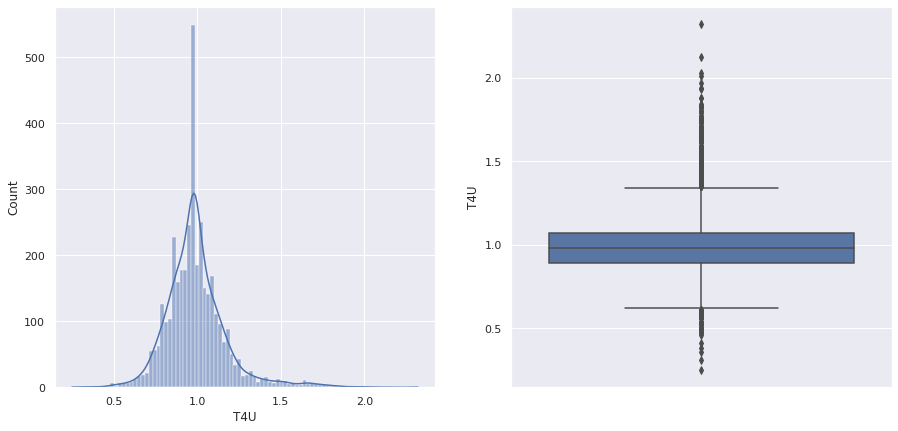

In [ ]:
UVA_cont(df, 'T4U')

- T4U varies between 0.25-2.32 with an average & median ~1.

#### `FTI`

FTI
    ----------------------
    MEAN: 110.11713073455317
    MEDIAN: 107.0
    STD DEV: 31.376683183124324
    KURTOSIS: 9.143838131309842
    SKEWNESS: 1.4508124684167079
    RANGE: 2.0 - 395.0
    ----------------------


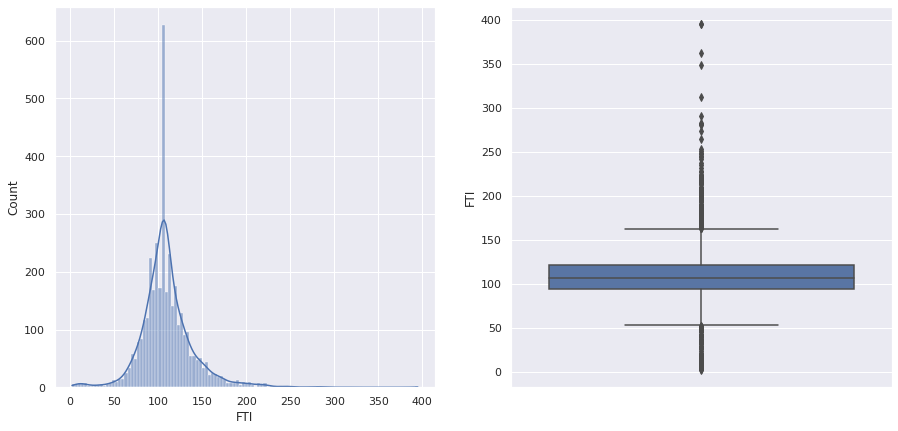

In [ ]:
UVA_cont(df, 'FTI')

 - Low FTI indicates hypothyroidism.
 - The average FTI we have is ~100 & it ranges from 2-395.

### Categorical

In [ ]:
def UVA_cat(df, col):
  nuniq = df[col].nunique()
  uniq_list = list(df[col].unique())
  vals = df[col].value_counts()
  vals_norm = df[col].value_counts(normalize = True)

  print('''{}
NUMBER OF UNIQUE VALUES: {}
UNIQUE VALUES: {}
----------------------------------
Number of values in each category:
  
{}
----------------------------------
% of values in each category:
  
{}
----------------------------------'''.format(col.upper(), nuniq, uniq_list, vals, vals_norm))
  
  sns.countplot(df[col])

#### `referral source`

REFERRAL SOURCE
NUMBER OF UNIQUE VALUES: 5
UNIQUE VALUES: ['SVHC', 'other', 'SVI', 'STMW', 'SVHD']
----------------------------------
Number of values in each category:
  
other    2201
SVI      1033
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64
----------------------------------
% of values in each category:
  
other    0.583665
SVI      0.273933
SVHC     0.102360
STMW     0.029700
SVHD     0.010342
Name: referral source, dtype: float64
----------------------------------


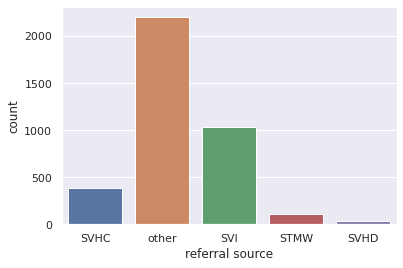

In [ ]:
UVA_cat(df, 'referral source')

- Excpet for the other, the referral source seems to come mostly from SVI(27%) & only 39 of them seem to come from SVHD.

#### `sex`

SEX
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: ['F', 'M']
----------------------------------
Number of values in each category:
  
F    2629
M    1142
Name: sex, dtype: int64
----------------------------------
% of values in each category:
  
F    0.697163
M    0.302837
Name: sex, dtype: float64
----------------------------------


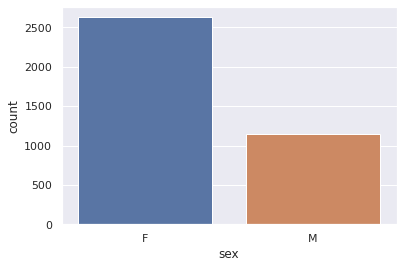

In [ ]:
UVA_cat(df, 'sex')

- There seem to be a lot more females as compared to males (7:3 ratio).

#### `on thyroxine`

ON THYROXINE
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: [0, 1]
----------------------------------
Number of values in each category:
  
0    3307
1     464
Name: on thyroxine, dtype: int64
----------------------------------
% of values in each category:
  
0    0.876956
1    0.123044
Name: on thyroxine, dtype: float64
----------------------------------


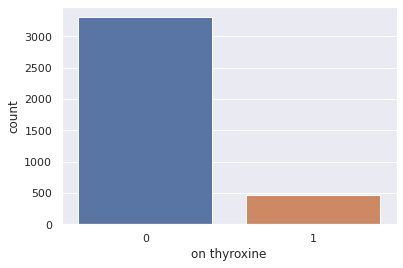

In [ ]:
UVA_cat(df, 'on thyroxine')

- So around 87.7% of the people are not on thyroxine & only 464 are on the medicine.

#### `query on thyroxine`

QUERY ON THYROXINE
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: [0, 1]
----------------------------------
Number of values in each category:
  
0    3721
1      50
Name: query on thyroxine, dtype: int64
----------------------------------
% of values in each category:
  
0    0.986741
1    0.013259
Name: query on thyroxine, dtype: float64
----------------------------------


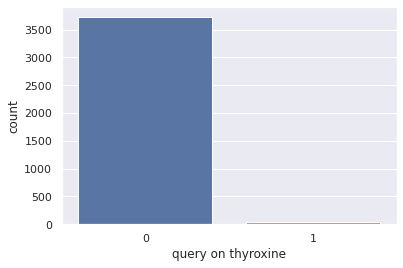

In [ ]:
UVA_cat(df, 'query on thyroxine')

- Out of all the people only 1.3% had a query on thyroxine.

#### `on antithyroid medication`

ON ANTITHYROID MEDICATION
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: [0, 1]
----------------------------------
Number of values in each category:
  
0    3728
1      43
Name: on antithyroid medication, dtype: int64
----------------------------------
% of values in each category:
  
0    0.988597
1    0.011403
Name: on antithyroid medication, dtype: float64
----------------------------------


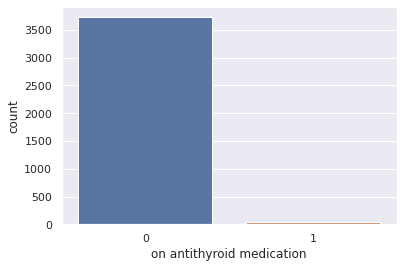

In [ ]:
UVA_cat(df, 'on antithyroid medication')

- 1.14% of the people are on antithyroid medication.

#### `sick`

SICK
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: [0, 1]
----------------------------------
Number of values in each category:
  
0    3624
1     147
Name: sick, dtype: int64
----------------------------------
% of values in each category:
  
0    0.961018
1    0.038982
Name: sick, dtype: float64
----------------------------------


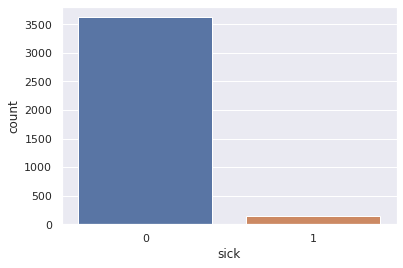

In [ ]:
UVA_cat(df, 'sick')

- over 96% of them are not sick which is a good sign.

#### `pregnant`

PREGNANT
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: [0, 1]
----------------------------------
Number of values in each category:
  
0    3718
1      53
Name: pregnant, dtype: int64
----------------------------------
% of values in each category:
  
0    0.985945
1    0.014055
Name: pregnant, dtype: float64
----------------------------------


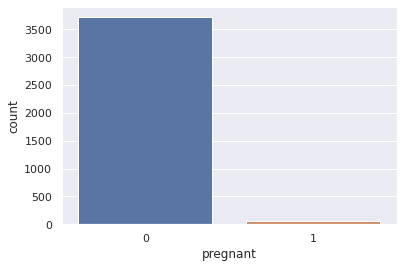

In [ ]:
UVA_cat(df, 'pregnant')

- of the 3771 people 53 are pregnant.

#### `thyroid surgery`

THYROID SURGERY
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: [0, 1]
----------------------------------
Number of values in each category:
  
0    3718
1      53
Name: thyroid surgery, dtype: int64
----------------------------------
% of values in each category:
  
0    0.985945
1    0.014055
Name: thyroid surgery, dtype: float64
----------------------------------


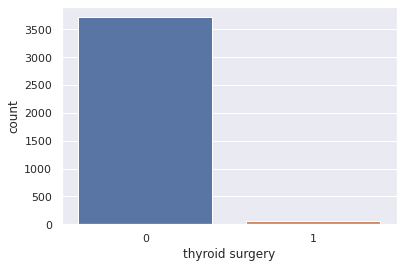

In [ ]:
UVA_cat(df, 'thyroid surgery')

- 53 have undergone a thyroid surgery

#### `I131 treatment`

I131 TREATMENT
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: [0, 1]
----------------------------------
Number of values in each category:
  
0    3712
1      59
Name: I131 treatment, dtype: int64
----------------------------------
% of values in each category:
  
0    0.984354
1    0.015646
Name: I131 treatment, dtype: float64
----------------------------------


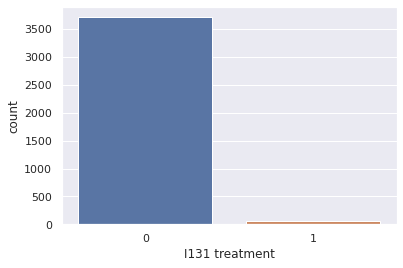

In [ ]:
UVA_cat(df, 'I131 treatment')

- A very small population(1.56%) of people have taken up the I131 treatment. 

####`query hypothyroid`

QUERY HYPOTHYROID
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: [0, 1]
----------------------------------
Number of values in each category:
  
0    3537
1     234
Name: query hypothyroid, dtype: int64
----------------------------------
% of values in each category:
  
0    0.937947
1    0.062053
Name: query hypothyroid, dtype: float64
----------------------------------


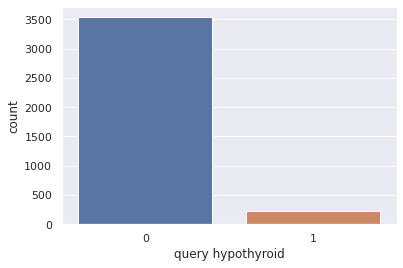

In [ ]:
UVA_cat(df, 'query hypothyroid')

- 6.2% had a query on hypothyroid

#### `query hyperthyroid`

QUERY HYPERTHYROID
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: [0, 1]
----------------------------------
Number of values in each category:
  
0    3534
1     237
Name: query hyperthyroid, dtype: int64
----------------------------------
% of values in each category:
  
0    0.937152
1    0.062848
Name: query hyperthyroid, dtype: float64
----------------------------------


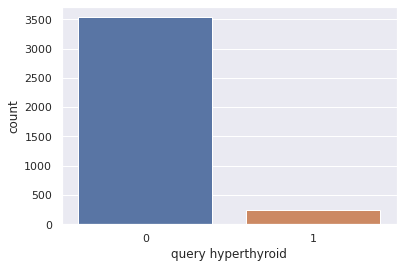

In [ ]:
UVA_cat(df, 'query hyperthyroid')

- 6.2% had a query on hyperthyroid

#### `lithium`

LITHIUM
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: [0, 1]
----------------------------------
Number of values in each category:
  
0    3753
1      18
Name: lithium, dtype: int64
----------------------------------
% of values in each category:
  
0    0.995227
1    0.004773
Name: lithium, dtype: float64
----------------------------------


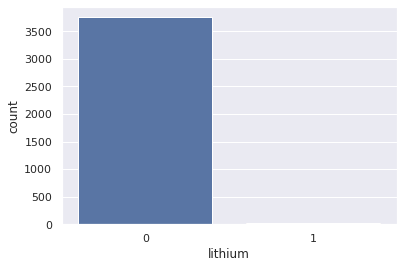

In [ ]:
UVA_cat(df, 'lithium')

- only 18 people are on lithium.

#### `goitre`

GOITRE
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: [0, 1]
----------------------------------
Number of values in each category:
  
0    3737
1      34
Name: goitre, dtype: int64
----------------------------------
% of values in each category:
  
0    0.990984
1    0.009016
Name: goitre, dtype: float64
----------------------------------


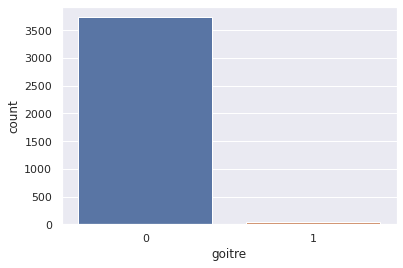

In [ ]:
UVA_cat(df, 'goitre')

- 34 people have been diagnosed with goitre.

#### `tumor`

TUMOR
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: [0, 1]
----------------------------------
Number of values in each category:
  
0    3675
1      96
Name: tumor, dtype: int64
----------------------------------
% of values in each category:
  
0    0.974543
1    0.025457
Name: tumor, dtype: float64
----------------------------------


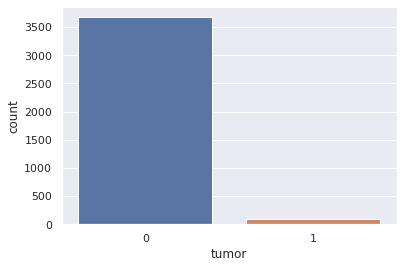

In [ ]:
UVA_cat(df, 'tumor')

- Over 2.5% (96) people have a tumor.

#### `hypopituitary`

HYPOPITUITARY
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: [0, 1]
----------------------------------
Number of values in each category:
  
0    3770
1       1
Name: hypopituitary, dtype: int64
----------------------------------
% of values in each category:
  
0    0.999735
1    0.000265
Name: hypopituitary, dtype: float64
----------------------------------


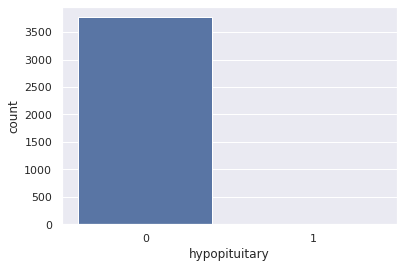

In [ ]:
UVA_cat(df, 'hypopituitary')

- Only 1 person is diagnosed with hypopituitarism.

#### `psych`

PSYCH
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: [0, 1]
----------------------------------
Number of values in each category:
  
0    3587
1     184
Name: psych, dtype: int64
----------------------------------
% of values in each category:
  
0    0.951207
1    0.048793
Name: psych, dtype: float64
----------------------------------


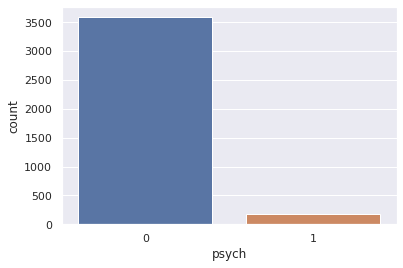

In [ ]:
UVA_cat(df, 'psych')

#### `referral source`

REFERRAL SOURCE
NUMBER OF UNIQUE VALUES: 5
UNIQUE VALUES: ['SVHC', 'other', 'SVI', 'STMW', 'SVHD']
----------------------------------
Number of values in each category:
  
other    2201
SVI      1033
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64
----------------------------------
% of values in each category:
  
other    0.583665
SVI      0.273933
SVHC     0.102360
STMW     0.029700
SVHD     0.010342
Name: referral source, dtype: float64
----------------------------------


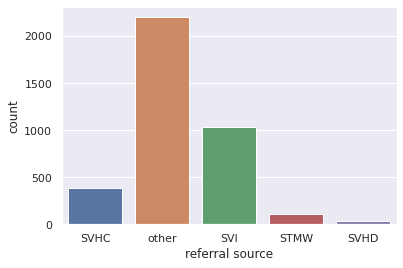

In [ ]:
UVA_cat(df, 'referral source')

- Except the others, SVI has the highest number (27.4%) then followed by SVHC (10.2%).

#### `binaryClass`

BINARYCLASS
NUMBER OF UNIQUE VALUES: 2
UNIQUE VALUES: ['P', 'N']
----------------------------------
Number of values in each category:
  
P    3480
N     291
Name: binaryClass, dtype: int64
----------------------------------
% of values in each category:
  
P    0.922832
N    0.077168
Name: binaryClass, dtype: float64
----------------------------------


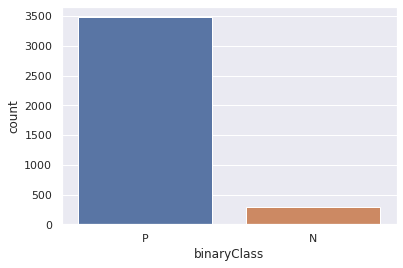

In [ ]:
UVA_cat(df, 'binaryClass')

 - There are around 92.28% positives in our dataset.
 - This is a highly imbalanced class & we will need to perform some upsampling/downsampling techniques to solve the problem.

## Bivariate Analysis

### Hypotheses:
1. `Older people are more likely to have hypothyroid.`
2. `Men & Women are equally likely to have hypothyroid.`
3. `People on thyroxine are less likely to have hypothyroid.`
4. `People on antithyroid are less likely to have hypothyroid.`
5. `Sick people are more likely to have hypothyroid.`
6. `Pregnant women are more likely to develop hypothyroid.`
7. `People undergone thyroid surgery are less likely to have hypothyroid.`
8. `The I131 treatment reduces the chance of hypothyroid.`
9. `People taking lithium have less chances of hypothyroid.`
10. `People with goitre are more likely to develop hypothyroid.`
11. `People with tumor have more chances of hypothyroidism.`
12. `People with high TSH levels are likely to have hypothyroid.`
13. `People with low T3 levels can have hypothyroid.`
14. `Lower values of TT4 indicate hypothyroidism.`
15. `Lower FTI levels can be a sign of hypothyroidism.`

In [ ]:
def BVA_cat(df, cat):
   print(pd.crosstab(df[cat], df['binaryClass']))
   print('----------------------------------------')
   print('INDEX/ROW-WISE NORMALIZATION:')
   print(pd.crosstab(df[cat], df['binaryClass'], normalize = 'index'))
   print('----------------------------------------')
   print('COLUMN-WISE NORMALIZATION:')
   print(pd.crosstab(df[cat], df['binaryClass'], normalize = 'columns'))
   table = pd.crosstab(df['binaryClass'], df[cat])
   f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])
   from scipy.stats import chi2_contingency
   chi, p, dof, expected = chi2_contingency(f_obs)
   if p<0.05:
     sig = True
   else:
     sig = False
   sns.countplot(x = df[cat], hue = df['binaryClass'])
   plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,4),sig))

In [ ]:
from scipy.stats import mannwhitneyu
def BVA_cont(df, cont):
  x1 = df[cont][df['binaryClass'] == 'N'][:]
  x2 = df[cont][df['binaryClass'] == 'P'][:]
  t_p_val = mannwhitneyu(x1,x2, alternative='two-sided')
  print('p-value(Mann-Whitney U test): {}\n'.format(t_p_val[1]))
  if t_p_val[1] <= 0.05:
    print(f'The difference in {cont} for the two groups is **significant**')
  else:
    print(f'The difference in {cont} for the two groups is **not significant**')
  fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,7))
  sns.barplot(x = df['binaryClass'], y = df[cont], ax = ax[0])
  ax[0].set_title(f'BARPLOT: {cont} vs Class')
  sns.boxplot(x = df['binaryClass'], y = df[cont], ax = ax[1])
  ax[1].set_title(f'BOXPLOT: {cont} vs Class')
  return df.groupby('binaryClass').agg({cont:'mean'})


#### `Are older people more likely to have hypothyroid?`

p-value(Mann-Whitney U test): 0.8983672932727876

The difference in age for the two groups is **not significant**


,age
binaryClass,
N,51.515464
P,51.639080


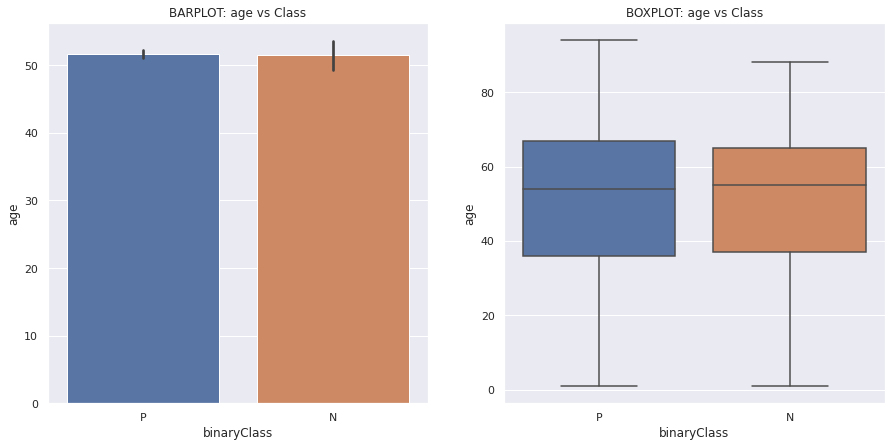

In [ ]:
BVA_cont(df, 'age')

- We can see that ages of the two groups are not significantly different therefore we will **reject** our hypothesis that older people are likely to get hypothyroid.

#### `Are men & women equally likely to have hypothyroid?`

binaryClass    N     P
sex                   
F            226  2403
M             65  1077
----------------------------------------
INDEX/ROW-WISE NORMALIZATION:
binaryClass         N         P
sex                            
F            0.085964  0.914036
M            0.056918  0.943082
----------------------------------------
COLUMN-WISE NORMALIZATION:
binaryClass         N         P
sex                            
F            0.776632  0.690517
M            0.223368  0.309483


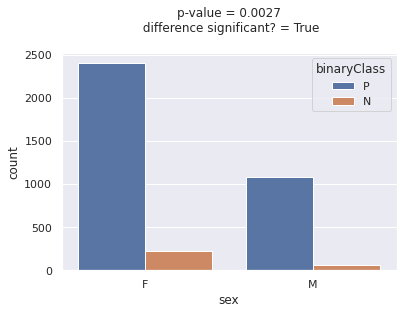

In [ ]:
BVA_cat(df, 'sex')

- By the chi-square result on our data, we can conclude that a relationship exists between the sex of the person & whether he/she has hypothyroid or not.

#### `does Thyroxine has any effect on whether you have hypothyroid or not?`

binaryClass     N     P
on thyroxine           
0             282  3025
1               9   455
----------------------------------------
INDEX/ROW-WISE NORMALIZATION:
binaryClass          N         P
on thyroxine                    
0             0.085274  0.914726
1             0.019397  0.980603
----------------------------------------
COLUMN-WISE NORMALIZATION:
binaryClass          N         P
on thyroxine                    
0             0.969072  0.869253
1             0.030928  0.130747


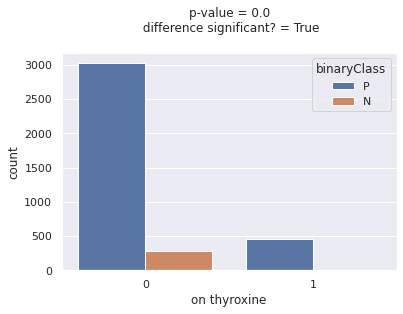

In [ ]:
BVA_cat(df, 'on thyroxine')

#### `Does antithyroxine have any effect on whether you get hypothyroid?`

binaryClass                  N     P
on antithyroid medication           
0                          290  3438
1                            1    42
----------------------------------------
INDEX/ROW-WISE NORMALIZATION:
binaryClass                       N         P
on antithyroid medication                    
0                          0.077790  0.922210
1                          0.023256  0.976744
----------------------------------------
COLUMN-WISE NORMALIZATION:
binaryClass                       N         P
on antithyroid medication                    
0                          0.996564  0.987931
1                          0.003436  0.012069


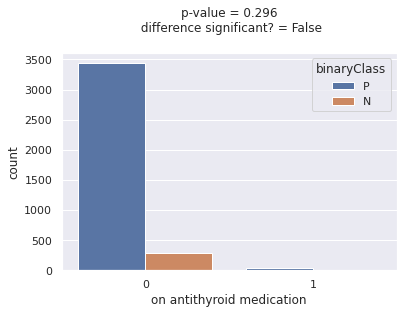

In [ ]:
BVA_cat(df, 'on antithyroid medication')

- There aren't enough samples of each class to come to a conclusion.

#### `Are sick people more likely to get hypothyroid?`

binaryClass    N     P
sick                  
0            280  3344
1             11   136
----------------------------------------
INDEX/ROW-WISE NORMALIZATION:
binaryClass         N         P
sick                           
0            0.077263  0.922737
1            0.074830  0.925170
----------------------------------------
COLUMN-WISE NORMALIZATION:
binaryClass         N        P
sick                          
0            0.962199  0.96092
1            0.037801  0.03908


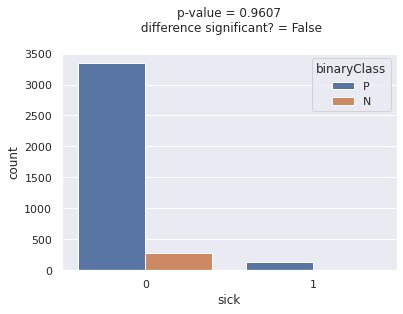

In [ ]:
BVA_cat(df, 'sick')

- Whether you are sick or not has no direct relation with hypothyroid.

#### `Are pregnant women more likely to develop hypothyroid?`

binaryClass    N     P
pregnant              
0            291  3427
1              0    53
----------------------------------------
INDEX/ROW-WISE NORMALIZATION:
binaryClass         N         P
pregnant                       
0            0.078268  0.921732
1            0.000000  1.000000
----------------------------------------
COLUMN-WISE NORMALIZATION:
binaryClass    N        P
pregnant                 
0            1.0  0.98477
1            0.0  0.01523


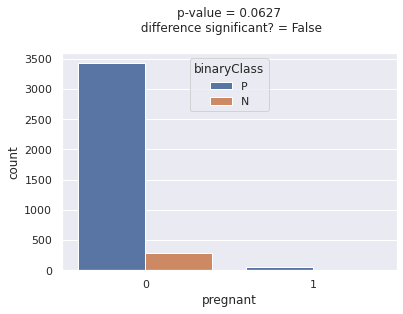

In [ ]:
BVA_cat(df, 'pregnant')

- According to the 95% confidence value, your pregnancy does not expose you to hypothyroid.

#### `Does thyroid surgery have any effect on whether you get hypothyroid?`

binaryClass        N     P
thyroid surgery           
0                289  3429
1                  2    51
----------------------------------------
INDEX/ROW-WISE NORMALIZATION:
binaryClass             N         P
thyroid surgery                    
0                0.077730  0.922270
1                0.037736  0.962264
----------------------------------------
COLUMN-WISE NORMALIZATION:
binaryClass             N         P
thyroid surgery                    
0                0.993127  0.985345
1                0.006873  0.014655


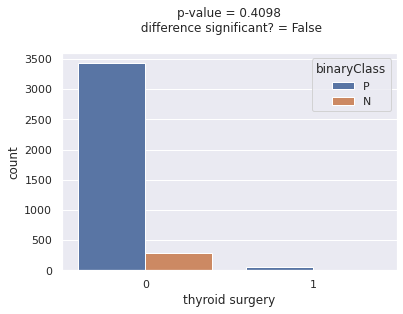

In [ ]:
BVA_cat(df, 'thyroid surgery')

- The p-val suggests that the surgery has had no effect on the people considered in our dataset.

#### `Does I131 treatment have any effect on whether you get hypothyroid?`

binaryClass       N     P
I131 treatment           
0               286  3426
1                 5    54
----------------------------------------
INDEX/ROW-WISE NORMALIZATION:
binaryClass            N         P
I131 treatment                    
0               0.077047  0.922953
1               0.084746  0.915254
----------------------------------------
COLUMN-WISE NORMALIZATION:
binaryClass            N         P
I131 treatment                    
0               0.982818  0.984483
1               0.017182  0.015517


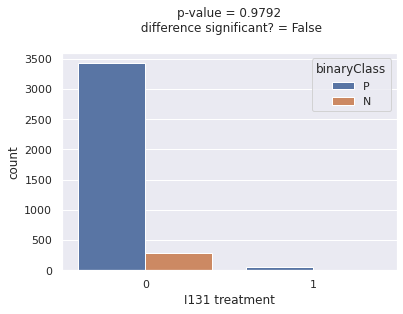

In [ ]:
BVA_cat(df, 'I131 treatment')

- According to the chi-square test, the I131 treatment is not helpful.

#### `Does lithium help withhypothyroid?`

binaryClass    N     P
lithium               
0            290  3463
1              1    17
----------------------------------------
INDEX/ROW-WISE NORMALIZATION:
binaryClass         N         P
lithium                        
0            0.077272  0.922728
1            0.055556  0.944444
----------------------------------------
COLUMN-WISE NORMALIZATION:
binaryClass         N         P
lithium                        
0            0.996564  0.995115
1            0.003436  0.004885


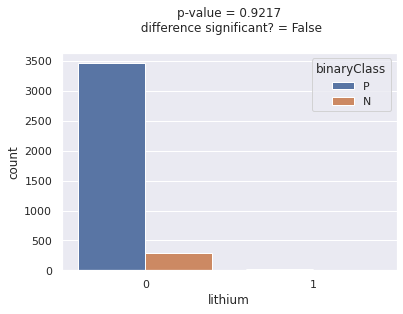

In [ ]:
BVA_cat(df, 'lithium')

- Again due to the small values, we cannot rely on the p-val here.

#### `Does having goitre have any effect on whether you get hypothyroid?`

binaryClass    N     P
goitre                
0            291  3446
1              0    34
----------------------------------------
INDEX/ROW-WISE NORMALIZATION:
binaryClass        N        P
goitre                       
0            0.07787  0.92213
1            0.00000  1.00000
----------------------------------------
COLUMN-WISE NORMALIZATION:
binaryClass    N        P
goitre                   
0            1.0  0.99023
1            0.0  0.00977


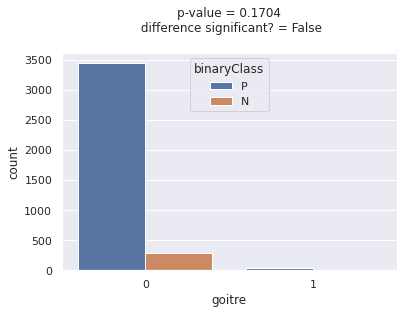

In [ ]:
BVA_cat(df, 'goitre')

- Unreliable test

#### `Does having tumor increses your chances of hypothyroid?`

binaryClass    N     P
tumor                 
0            283  3392
1              8    88
----------------------------------------
INDEX/ROW-WISE NORMALIZATION:
binaryClass         N         P
tumor                          
0            0.077007  0.922993
1            0.083333  0.916667
----------------------------------------
COLUMN-WISE NORMALIZATION:
binaryClass         N         P
tumor                          
0            0.972509  0.974713
1            0.027491  0.025287


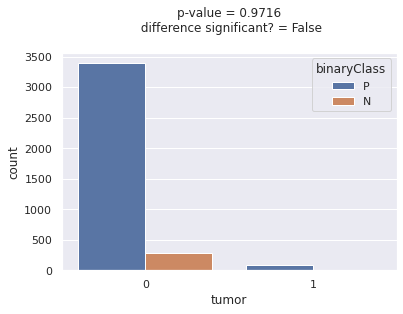

In [ ]:
BVA_cat(df, 'tumor')

- According to the test, tumor has nothing to do with hypothyroid in our patients.

#### `Do the TSH levels have any effect on whether you get hypothyroid?`

p-value(Mann-Whitney U test): 9.310081454984014e-169

The difference in TSH for the two groups is **significant**


,TSH
binaryClass,
N,39.234072
P,1.841566


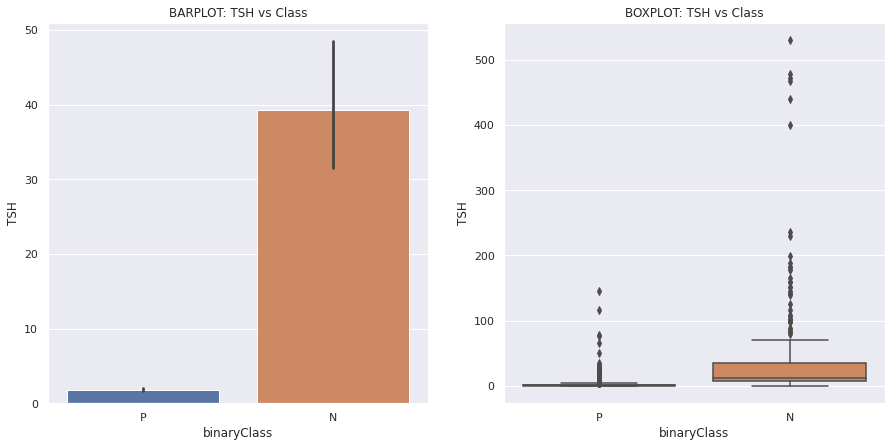

In [ ]:
BVA_cont(df, 'TSH')

- According to the test, People with low TSH levels have a higher chance of getting diagnosed with hypothyroid.

#### `Do the T3 levels have any effect on whether you get hypothyroid?`

p-value(Mann-Whitney U test): 4.7539874746431705e-23

The difference in T3 for the two groups is **significant**


,T3
binaryClass,
N,1.557732
P,2.048632


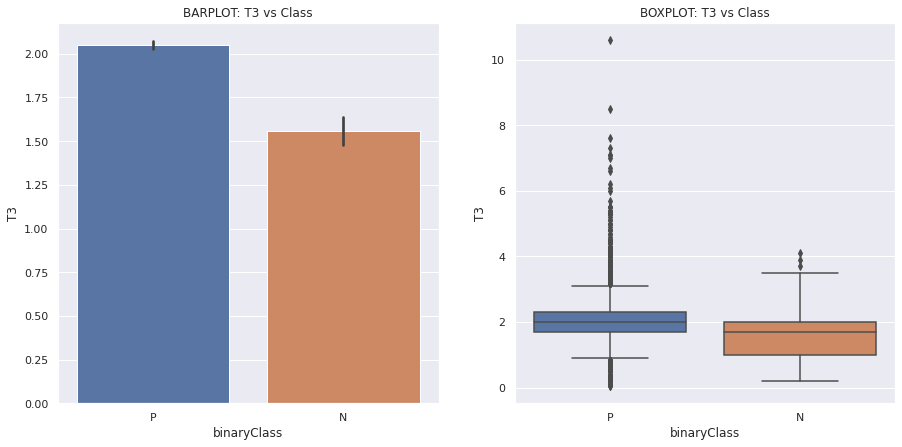

In [ ]:
BVA_cont(df, 'T3')

- Higher T3 levels seem to be an indicator of hypothyroid.

#### `Do the TT4 levels have any effect on whether you get hypothyroid?`

p-value(Mann-Whitney U test): 3.722931721431561e-59

The difference in TT4 for the two groups is **significant**


,TT4
binaryClass,
N,73.432302
P,110.880747


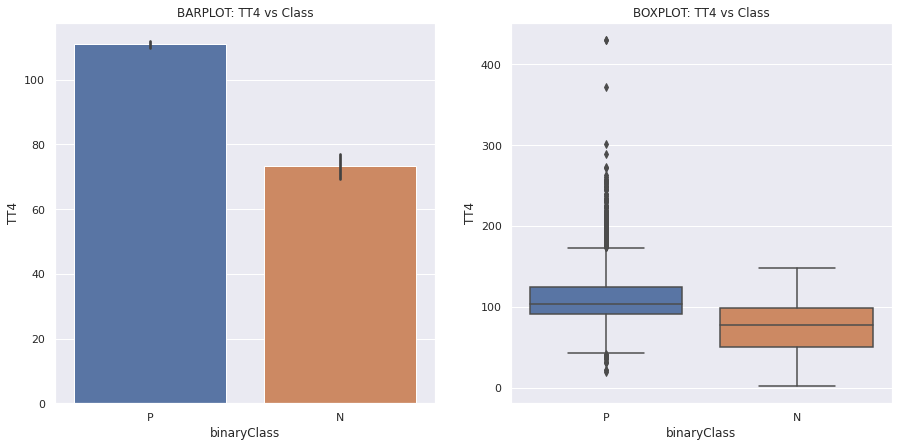

In [ ]:
BVA_cont(df, 'TT4')

- Higher levels of TT4 can be a concern for hypothyroid.

#### `Do the FTI levels have any effect on whether you get hypothyroid?`

p-value(Mann-Whitney U test): 9.272610387759094e-64

The difference in FTI for the two groups is **significant**


,FTI
binaryClass,
N,76.146735
P,112.957759


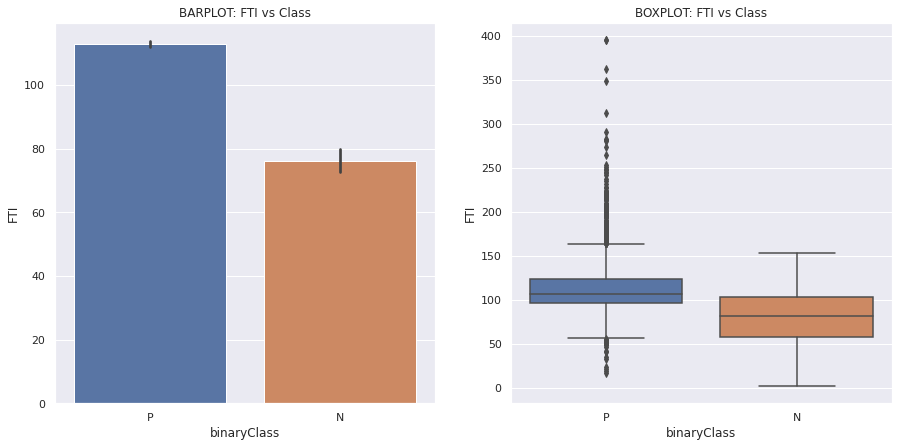

In [ ]:
BVA_cont(df, 'FTI')

- Higher levels of FTI can be be a diagnosis of hypothyroid.